# Decision Tree Lab

In [17]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

## 1 Debug and Eval

### 1.1 (5%) Debug 

- Train a DecisionTreeClassifier on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8') 

Expected Accuracy = [1.0]


In [11]:
data, meta = arff.loadarff("iris.arff")

df = pd.DataFrame(data)

for col in df.select_dtypes([object]):  
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.93
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



### 1.2 (5%) Evaluation 

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [ ]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.97
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### Discussion
What did you see? What were the differences in accuracy between the two trained models? How do you account for the differences or no differences? 

The accuracy of the first DecisionTreeClassifier and the second are the same, which implies that the model absolutely overfits. If max accuracy is reached at depth 3, then we shouldnt train deeper than that. The model is optimal at depth 3, so we don't need to go farther than that.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

    democrat       0.96      0.98      0.97        48
  republican       0.97      0.95      0.96        39

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.97        87
weighted avg       0.97      0.97      0.97        87



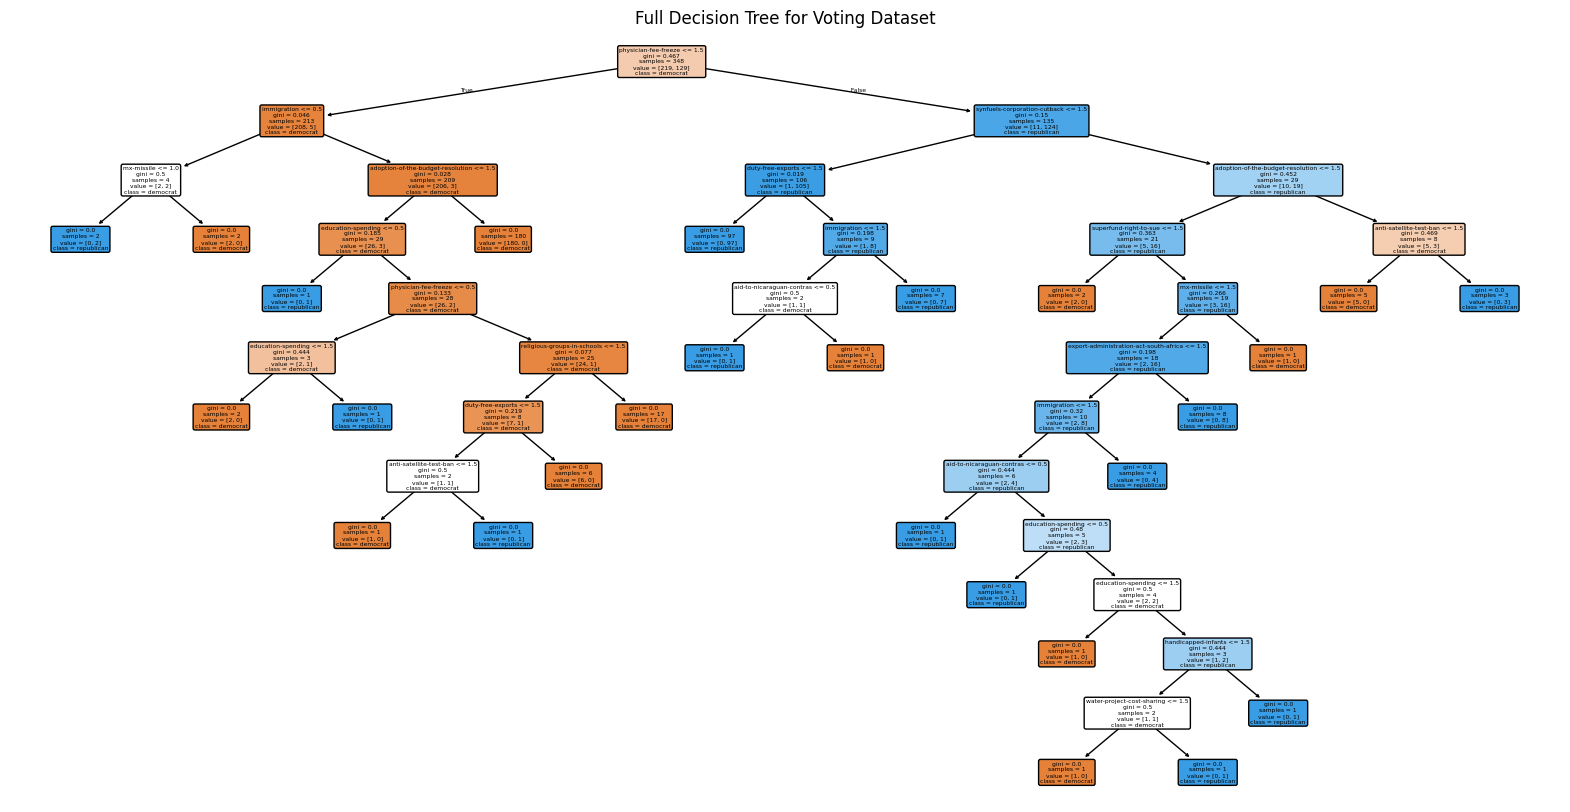

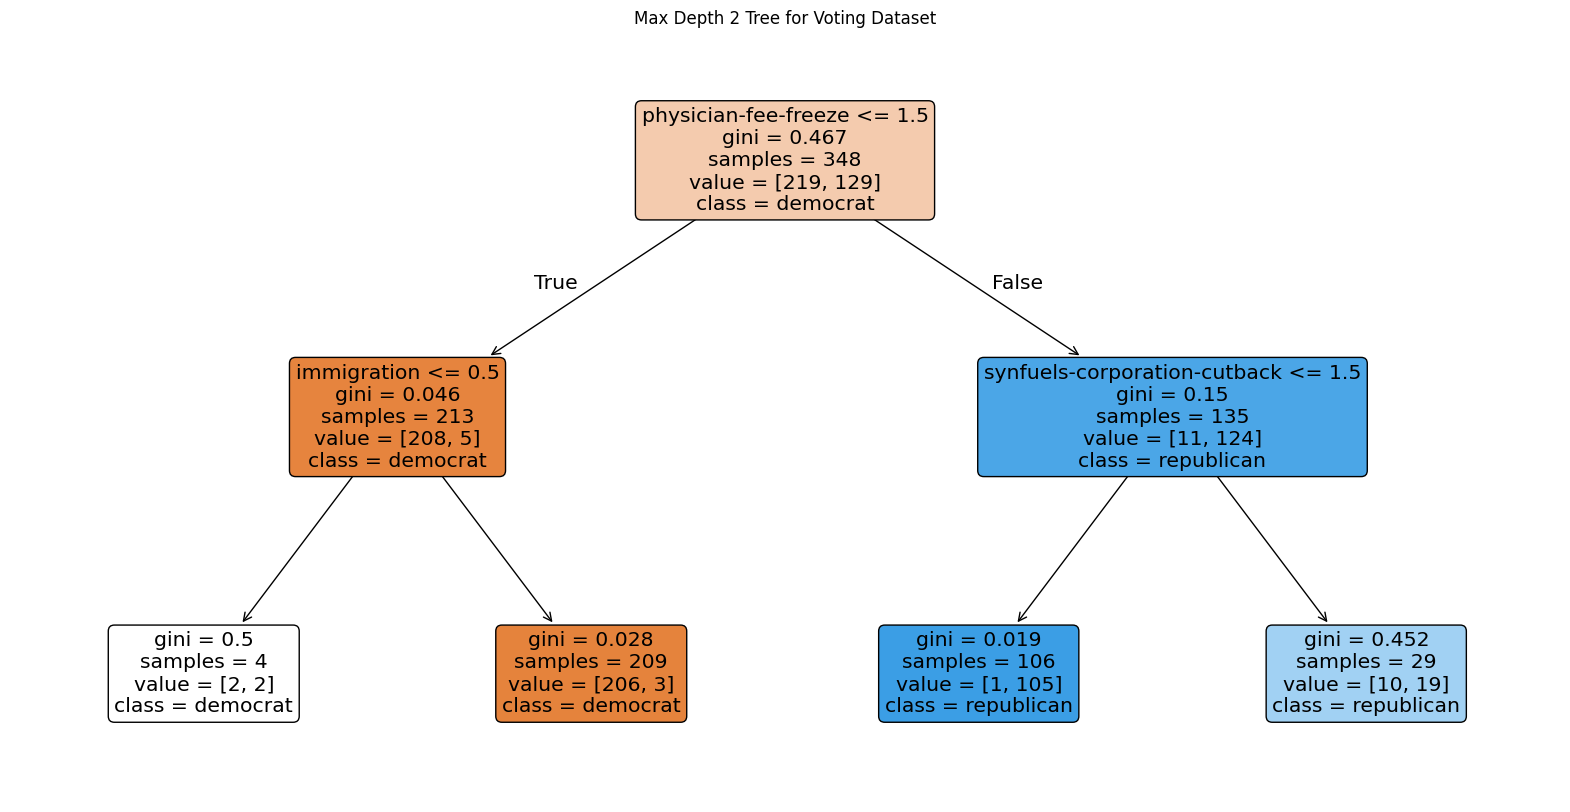

Accuracy with Gini: 0.9540
Accuracy with Entropy: 0.9655
[0.00615907 0.00307954 0.01397473 0.81823517 0.         0.00104704
 0.02309653 0.         0.02769782 0.01947803 0.03155187 0.01846711
 0.02196582 0.         0.0075142  0.00773306]
[0.00604197 0.00376147 0.05096616 0.73056403 0.         0.01178226
 0.02910863 0.         0.02392139 0.0051644  0.06789643 0.02121881
 0.00875206 0.00647008 0.01629185 0.01806047]


In [67]:
data, meta = arff.loadarff("voting.arff")
df_not_imputed = pd.DataFrame(data)

imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df_not_imputed))

df.columns = df_not_imputed.columns

for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

label_encoder = LabelEncoder()

for col in df.columns[:-1]:
    df[col] = label_encoder.fit_transform(df[col])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

votingClf = DecisionTreeClassifier()
votingClfDepth2 = DecisionTreeClassifier(max_depth=2)
votingClf.fit(X_train, y_train)
votingClfDepth2.fit(X_train, y_train)

y_pred = votingClf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:\n', classification_report(y_test, y_pred, target_names=y_encoder.classes_))

plt.figure(figsize=(20, 10))
plot_tree(votingClf, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y), rounded=True)
plt.title('Full Decision Tree for Voting Dataset')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(votingClfDepth2, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y), rounded=True)
plt.title('Max Depth 2 Tree for Voting Dataset')
plt.show()

print(f"Accuracy with Gini: {accuracy_gini:.4f}")
print(f"Accuracy with Entropy: {accuracy_entropy:.4f}")
feature_importances = tree_gini.feature_importances_
print(feature_importances)
feature_importances = tree_entropy.feature_importances_
print(feature_importances)


#### Discussion
Report on your accuracies and include explaining how the missing values were handled by your model

The accuracies I got with this model were between 91% and 94%.

In my model, I used the sklearn imputer. I just had the imputer fill in the missing data with the most common data from that column. 

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

10- old Cross-Validation Accuracy:
Accuracies by fold: [0.62427746 0.79190751 0.93063584 0.76300578 0.9017341  0.94797688
 0.87283237 0.89017341 0.95930233 0.95348837]
Average accuracy: 0.8635

5 Fold Cross-Validation Accuracy:
Accuracies by fold: [0.58092486 0.83236994 0.78034682 0.86086957 0.87536232]
Average accuracy: 0.7860


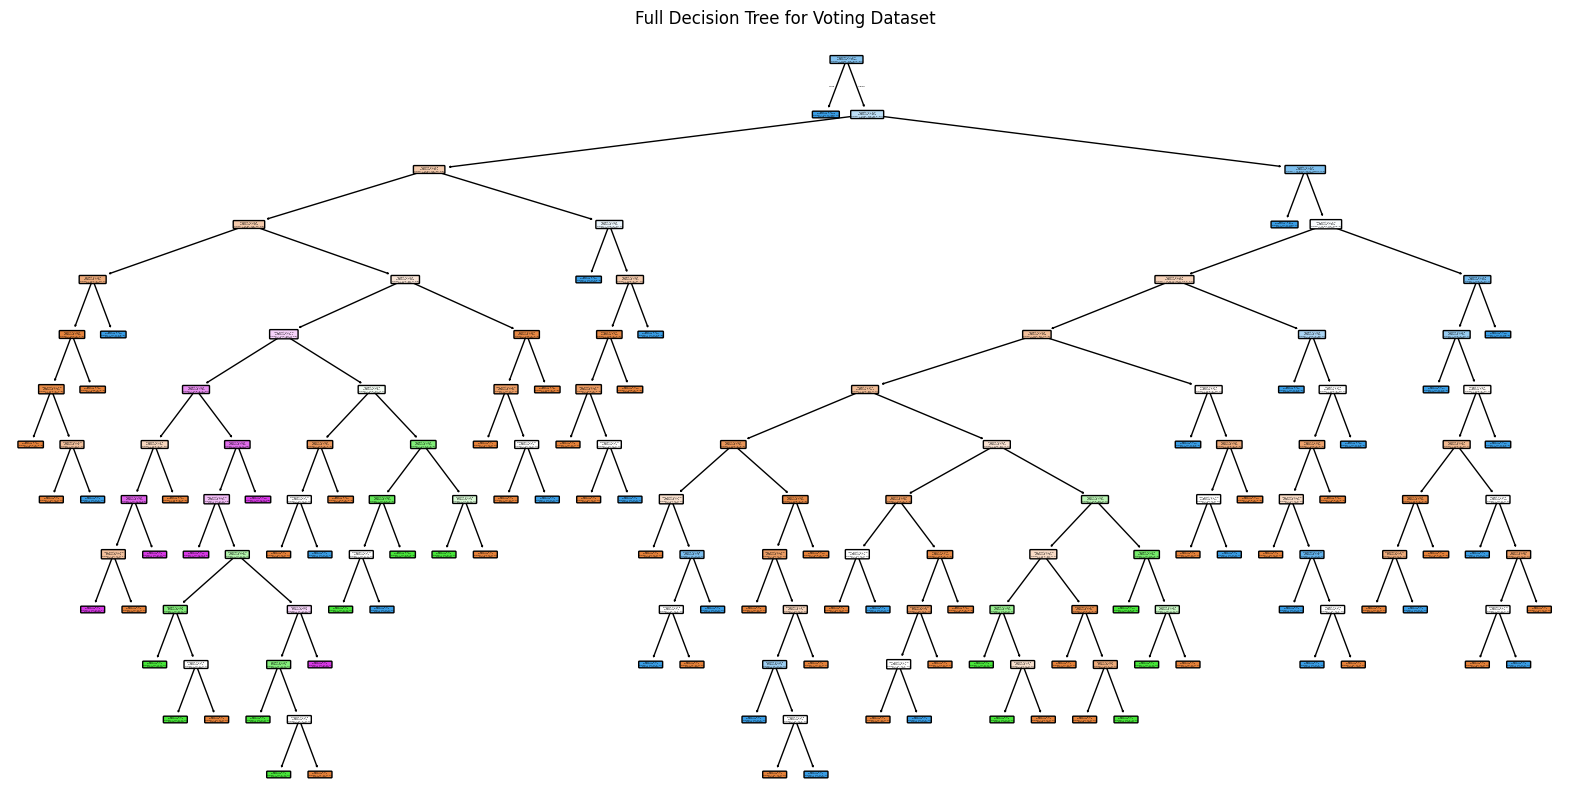

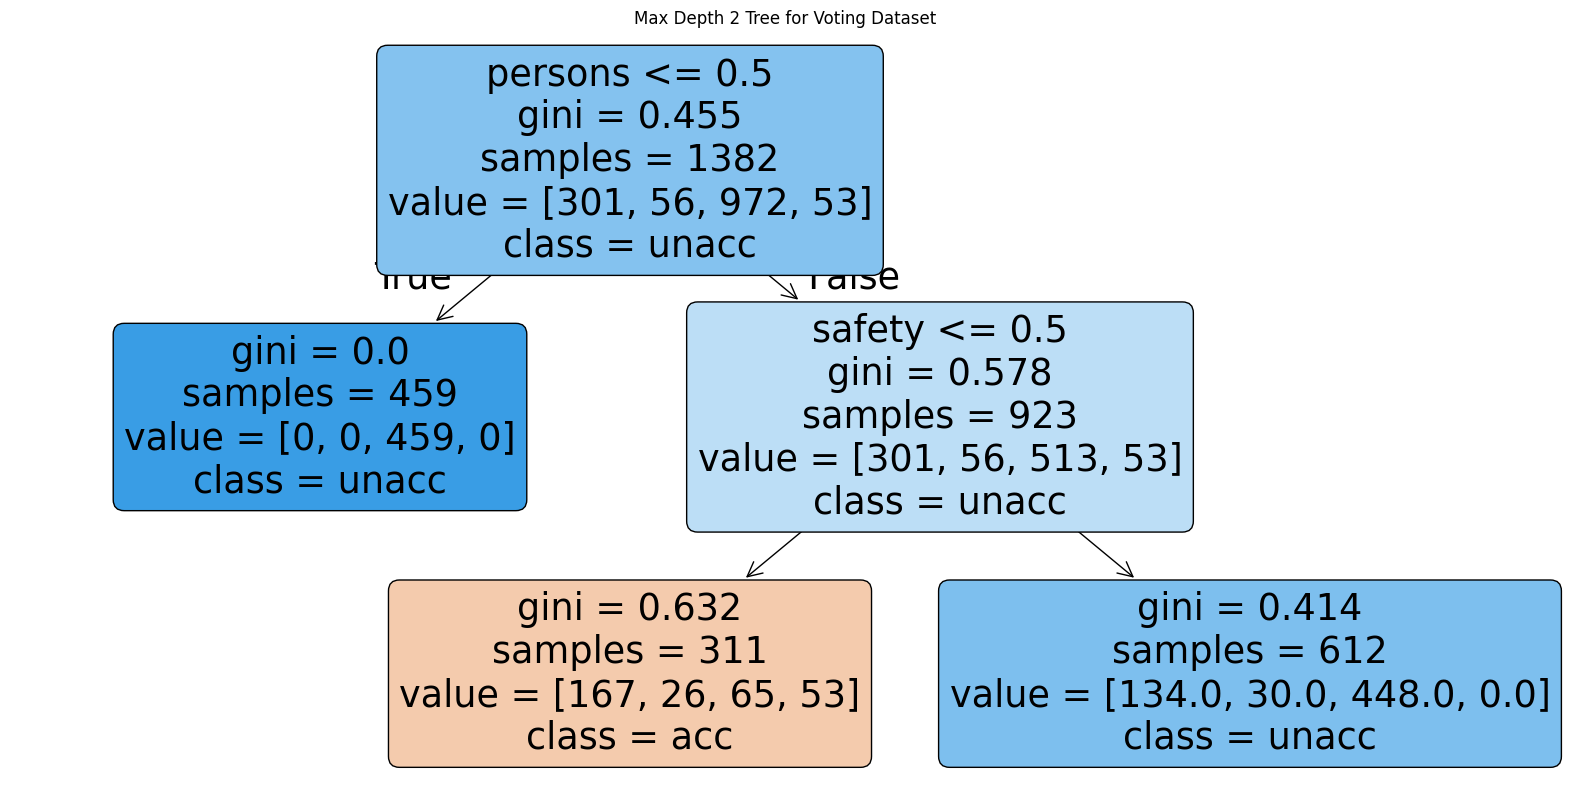

In [45]:
from sklearn.model_selection import cross_val_score
data, meta = arff.loadarff("cars.arff")
df_not_imputed = pd.DataFrame(data)

imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df_not_imputed))

df.columns = df_not_imputed.columns

for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

label_encoder = LabelEncoder()

for col in df.columns[:-1]:
    df[col] = label_encoder.fit_transform(df[col])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

carClf = DecisionTreeClassifier()
carClfDepth2 = DecisionTreeClassifier(max_depth=2)

carClf.fit(X_train, y_train)
carClfDepth2.fit(X_train, y_train)

cv_10 = cross_val_score(carClf, X, y, cv=10, scoring='accuracy')
cv_5 = cross_val_score(carClf, X, y, cv=5, scoring='accuracy')

print("10- old Cross-Validation Accuracy:")
print(f"Accuracies by fold: {cv_10}")
print(f"Average accuracy: {np.mean(cv_10):.4f}")

print("\n5 Fold Cross-Validation Accuracy:")
print(f"Accuracies by fold: {cv_5}")
print(f"Average accuracy: {np.mean(cv_5):.4f}")

plt.figure(figsize=(20, 10))
plot_tree(carClf, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y), rounded=True)
plt.title('Full Decision Tree for Voting Dataset')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(carClfDepth2, filled=True, feature_names=df.columns[:-1], class_names=np.unique(y), rounded=True)
plt.title('Max Depth 2 Tree for Voting Dataset')
plt.show()

#### Discussion
Explain n-fold cross validation. Why do we do it? How is it useful? What does it reveal? Do we end up with a model? If so, which one? 

N-fold cross-validation is where we split the dataset into "n" equal parts, and then train the model on all but one of folds, and then testing it on the remaining fold. This process is repeated for each fold, giving us multiple performance metrics.

We perform n-fold cross-validation to get a more reliable estimate of how a model will perform on unseen data, ensuring that the results aren’t overfit. It helps reduce overfitting by testing the model on different subsets of data, making the evaluation more robust and less sensitive to particular data distributions.

It reveals how stable and consistent the model’s performance is across different subsets of the data, highlighting its ability to generalize well.

While n-fold cross-validation doesn't give us a final model, after the process, we can retrain the model on the entire dataset and use that as the final model for making predictions. I think what I would do is a weighted average between all the folds' weights. I'm not sure how I would implement that well though.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered). 
- Compare your thoughts on important features with the attribute feature_importances_

In [70]:
# Included the plot code above with the classifiers. I didn't want to rename all my variables.
feature_importances = carClfDepth2.feature_importances_
print(feature_importances)
feature_importances = votingClfDepth2.feature_importances_
print(feature_importances)
print("Most important feature is feature 3... Physician fee freeze!")

[0.         0.         0.         0.57437409 0.         0.42562591]
[0.         0.         0.         0.94995674 0.         0.
 0.         0.         0.         0.01328455 0.03675871 0.
 0.         0.         0.         0.        ]
Most important feature is feature 3... Physician fee freeze!


#### Discussion 
Discuss what the Trees have learned on the 2 data sets (i.e. look at the induced trees and describe what "rules" they discovered). How do the important features you would think about correspond the the "feature_importances_"

The most divisive feature in the voting dataset is the physician_fee_freeze feature. The gini scores for both children of the initial node are both super close to 0, meaning that almost unilaterally, republicans and democrats disagreed on this question. If we print out the feature_importances_, we can see that the physician fee freeze has a 95% weight of importance for it!

The car dataset is heavily split between Persons and Safety being the most definitive features of the dataset. Since the Persons features is weighted slightly more, That was chosen as the initial node.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [ ]:
# Experiment with criterion parameter

# tree_gini = DecisionTreeClassifier(criterion='gini')
# tree_gini.fit(X_train, y_train)
# y_pred_gini = tree_gini.predict(X_test)
# accuracy_gini = accuracy_score(y_test, y_pred_gini)

# tree_entropy = DecisionTreeClassifier(criterion='entropy')
# tree_entropy.fit(X_train, y_train)
# y_pred_entropy = tree_entropy.predict(X_test)
# accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# I put this near my initial voting clf.

#### Discussion
How does using different split criteria (entropy, log-loss, and gini) affect accuracy, tree structure, and feature importance?

I think that because I chose to work with the voting data, and the most important feature is the physician fee freeze, that its not really too imporant whether we split based on entropy, log-loss, or gini. The total accuracy of the tree is still between 91 and 95 percent regardless.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%) 
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [ ]:
data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)

label_encoder = LabelEncoder()

for col in df.columns[:-1]:
    df[col] = label_encoder.fit_transform(df[col])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

carClf = DecisionTreeClassifier()
carClf.fit(X_train, y_train)

y_pred = carClf.predict(X_test)

train_accuracy = carClf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
num_nodes = carClf.tree_.node_count
max_depth = carClf.tree_.max_depth

print(f"Fully Induced Tree:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Total Nodes: {num_nodes}")
print(f"Max Depth: {max_depth}\n")

param_grid = {
    "min_samples_leaf": [1, 5, 10, 20],
    "min_samples_split": [2, 10, 20, 50],
    "min_impurity_decrease": [0.0, 0.01, 0.05, 0.1],
    "max_depth": [None, 5, 10, 15],
    "max_leaf_nodes": [None, 10, 20, 50],
    "max_features": [None, "sqrt", "log2", 3]
}

for param, values in param_grid.items():
    print(f"\n### Experimenting with {param} ###\n")
    for value in values:
        carClf = DecisionTreeClassifier(**{param: value})
        carClf.fit(X_train, y_train)
        
        train_acc = carClf.score(X_train, y_train)
        test_acc = accuracy_score(y_test, carClf.predict(X_test))
        num_nodes = carClf.tree_.node_count
        max_depth = carClf.tree_.max_depth
        
        print(f"{param}={value}: Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Nodes: {num_nodes}, Depth: {max_depth}")

Fully Induced Tree:
Training Accuracy: 1.0000
Test Accuracy: 0.9855
Total Nodes: 181
Max Depth: 14


### Experimenting with min_samples_leaf ###

min_samples_leaf=1: Train Acc: 1.0000, Test Acc: 0.9827, Nodes: 183, Depth: 14
min_samples_leaf=5: Train Acc: 0.9732, Test Acc: 0.9595, Nodes: 111, Depth: 11
min_samples_leaf=10: Train Acc: 0.9515, Test Acc: 0.9509, Nodes: 79, Depth: 10
min_samples_leaf=20: Train Acc: 0.9059, Test Acc: 0.8728, Nodes: 53, Depth: 9

### Experimenting with min_samples_split ###

min_samples_split=2: Train Acc: 1.0000, Test Acc: 0.9827, Nodes: 183, Depth: 14
min_samples_split=10: Train Acc: 0.9747, Test Acc: 0.9538, Nodes: 111, Depth: 11
min_samples_split=20: Train Acc: 0.9559, Test Acc: 0.9624, Nodes: 79, Depth: 10
min_samples_split=50: Train Acc: 0.9124, Test Acc: 0.9133, Nodes: 39, Depth: 8

### Experimenting with min_impurity_decrease ###

min_impurity_decrease=0.0: Train Acc: 1.0000, Test Acc: 0.9827, Nodes: 183, Depth: 14
min_impurity_decrease=0.01: Train A

#### Discussion
How did the methods used above help avoid overfit? How do you know? How did they affect accuracy (training and test) and tree structure? Which parameters helped the most with each dataset? How do you know?

These methods helped keep the tree from overfitting by making it simpler and forcing it to generalize better. min_samples_leaf and min_samples_split stopped it from splitting on tiny groups of data. max_depth and max_leaf_nodes limited how deep it could go. min_impurity_decrease made sure splits only happened if they actually improved the tree, and max_features prevented it from relying too much on any one feature. We know they worked because they brought training and test accuracy closer together and made the tree smaller. The best results usually came from combining multiple constraints to get a solid balance between accuracy and overfitting.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [403]:
ccp_alpha_values = [0.0, 0.001, 0.003, 0.005, 0.01, 0.05]

results = []

for alpha in ccp_alpha_values:
    carClf = DecisionTreeClassifier(ccp_alpha=alpha)
    carClf.fit(X_train, y_train)
    
    train_acc = carClf.score(X_train, y_train)
    test_acc = accuracy_score(y_test, carClf.predict(X_test))
    num_nodes = carClf.tree_.node_count
    max_depth = carClf.tree_.max_depth
    
    results.append([alpha, train_acc, test_acc, num_nodes, max_depth])

results_df = pd.DataFrame(results, columns=["ccp_alpha", "Train Accuracy", "Test Accuracy", "Nodes", "Depth"])
print(results_df)

   ccp_alpha  Train Accuracy  Test Accuracy  Nodes  Depth
0      0.000        1.000000       0.985549    181     14
1      0.001        0.984805       0.971098    101     12
2      0.003        0.958755       0.962428     61     10
3      0.005        0.938495       0.936416     45      8
4      0.010        0.878437       0.875723     23      6
5      0.050        0.778582       0.774566      7      3


#### Discussion
How did the pruning parameter ccp_alpha affect accuracy and tree structure? How does that compare to the methods above?

Well, to start, it seems much easier to prune the tree using this method than to fine tune all of the different hyperparameters to try and guesstimate which hyperparameter was the most impactful for the dataset. As we prune, we will lose some accuracy on both the training and testing portions of the data, but this sacrifice make it much easier to generalize data. I would pick the ccp_alpha value of .003, because it get 95% and 96% accuracy on the training and testing portions of the data, while only using one THIRD of the nodes! Past that I dont think its as impactful to increase the ccp_alpha value much more.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

data, meta = arff.loadarff("pima_diabetes.arff")
df = pd.DataFrame(data)

label_encoder = LabelEncoder()

for col in df.columns[:-1]:
    df[col] = label_encoder.fit_transform(df[col])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3)

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

num_nodes = dt_regressor.tree_.node_count
num_leaves = dt_regressor.tree_.n_leaves
max_depth = dt_regressor.tree_.max_depth
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
y_pred = dt_regressor.predict(X_test)
train_accuracy = dt_regressor.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print
print(f"Decision Tree Regressor Results:")
print(f"Number of nodes: {num_nodes}")
print(f"Number of leaf nodes: {num_leaves}")
print(f"Maximum depth: {max_depth}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"MAE (Train): {mae_train:.4f}, MAE (Test): {mae_test:.4f}")
print(f"R² Score (Train): {r2_train:.4f}, R² Score (Test): {r2_test:.4f}")

Decision Tree Regressor Results:
Number of nodes: 179
Number of leaf nodes: 90
Maximum depth: 13
Train Acuuracy: 1.0
Test Accuracy: 0.6796536796536796
MAE (Train): 0.0000, MAE (Test): 0.3203
R² Score (Train): 1.0000, R² Score (Test): -0.3916


#### Discussion
Discuss your choice of dataset and regression feature. Also discuss the items listed above in 4.1

I reported the num_nodes, num_leaves, max_depth, mae_train, mae_test, r2_train, and r2_test above.

I chose to report on a diabetes dataset for the pima indians. This was probably a pretty terrible decision, but it was the cleanest dataset I could find on short notice!

The Decision Tree Regressor completely overfits the training data (R² = 1.0, MAE = 0), but its performance on the test set is weak, with a negative R² score, meaning it generalizes poorly. This happens because the model is too complex and memorizes the training data instead of learning real patterns. A simpler tree or another regression method might work better for this dataset.